In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/Road.csv")
df.sample(3).T

,5156,2428,2837
Time,14:35:00,18:36:00,17:52:00
Day_of_week,Saturday,Thursday,Saturday
Age_band_of_driver,31-50,31-50,31-50
Sex_of_driver,Male,Male,Male
Educational_level,Elementary school,Junior high school,Junior high school
Vehicle_driver_relation,Employee,Employee,Employee
Driving_experience,5-10yr,1-2yr,2-5yr
Type_of_vehicle,Pick up upto 10Q,Pick up upto 10Q,Lorry (41?100Q)
Owner_of_vehicle,Owner,Owner,Owner
Service_year_of_vehicle,NaN,Below 1yr,Above 10yr


In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

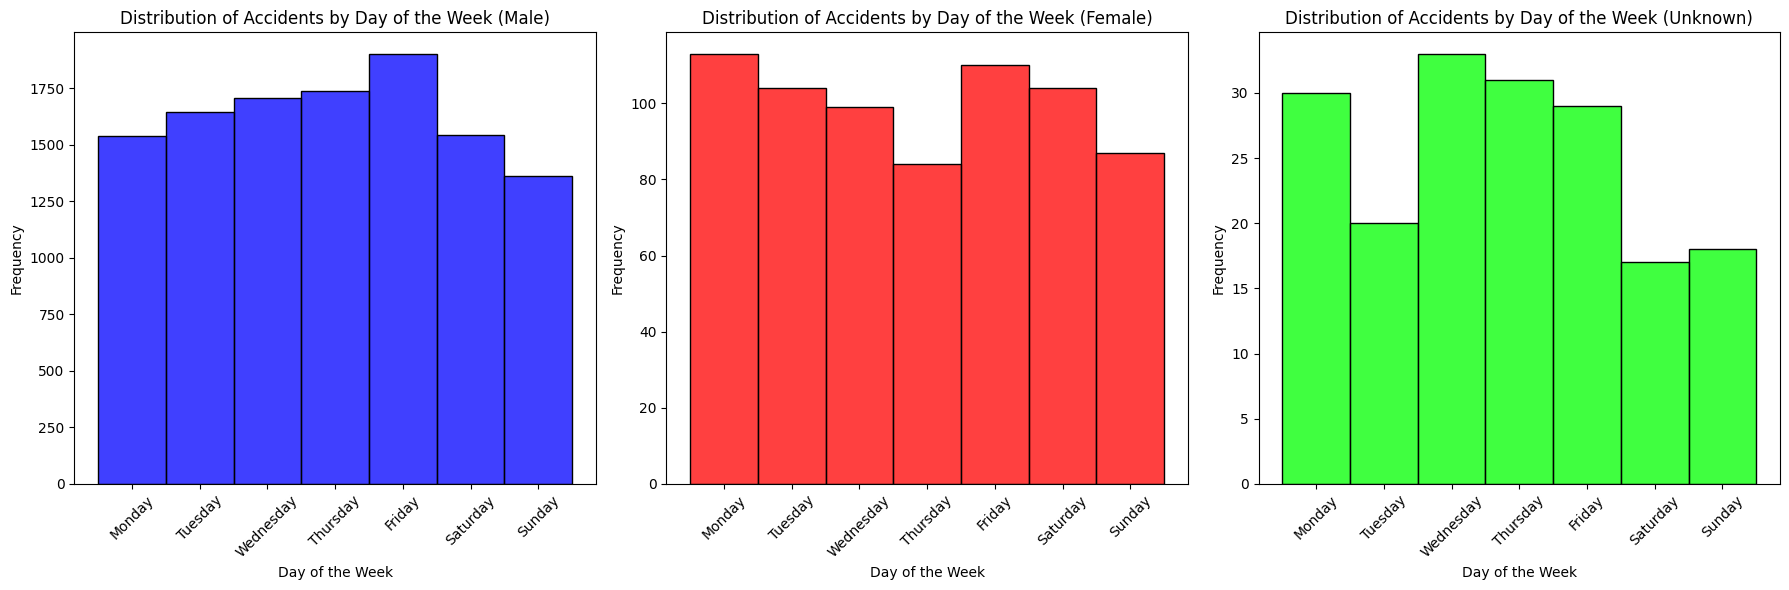

In [ ]:
days_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=days_ordered, ordered=True)

custom_colors = {'Male': '#0000FF', 'Female': '#FF0000', 'Unknown': '#00FF00'}

genders = ['Male', 'Female', 'Unknown']

plt.figure(figsize=(18, 6))

for i, gender in enumerate(genders):
    plt.subplot(1, 3, i+1)

    color_bin = custom_colors[gender]

    sns.histplot(data=df[df['Sex_of_driver'] == gender], x='Day_of_week', common_norm=False, color=color_bin)

    plt.xlabel("Day of the Week")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Accidents by Day of the Week ({gender})")

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


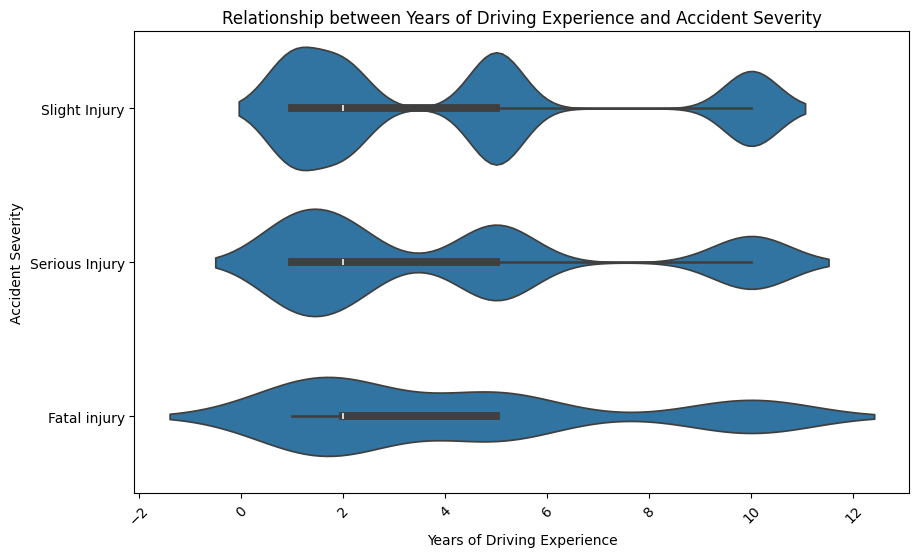

In [ ]:
df_filtered = df[df['Driving_experience'] != 'Unknown']

df_filtered['Driving_experience'] = df_filtered['Driving_experience'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtered, x='Driving_experience', y='Accident_severity')
plt.xlabel("Years of Driving Experience")
plt.ylabel("Accident Severity")
plt.title("Relationship between Years of Driving Experience and Accident Severity")
plt.xticks(rotation=45)
plt.show()


<ipython-input-50-c57eaf5f3495>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Light_conditions', order=df['Light_conditions'].value_counts().index, palette="Set1")


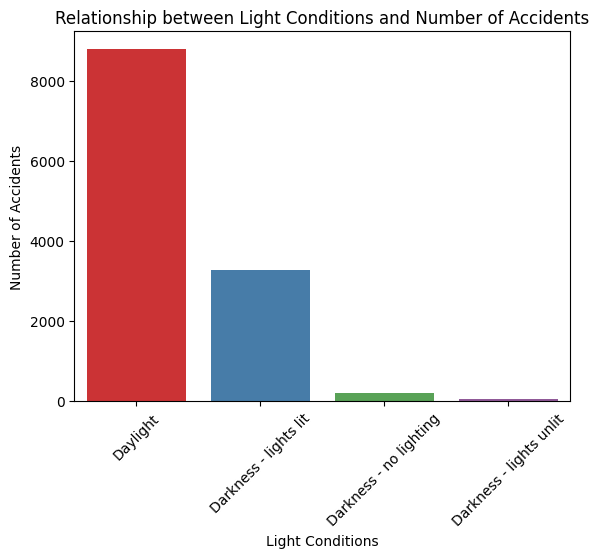

In [ ]:
sns.countplot(data=df, x='Light_conditions', order=df['Light_conditions'].value_counts().index, palette="Set1")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.title("Relationship between Light Conditions and Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<ipython-input-51-49e551f36f36>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Vehicle_movement', order=df['Vehicle_movement'].value_counts().index, palette="Set2")


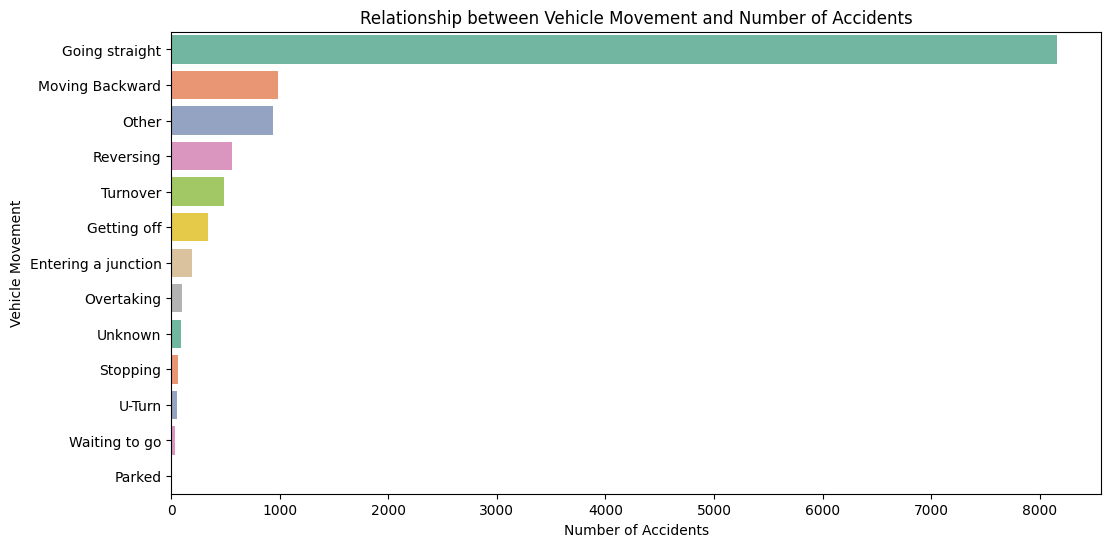

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Vehicle_movement', order=df['Vehicle_movement'].value_counts().index, palette="Set2")
plt.ylabel("Vehicle Movement")
plt.xlabel("Number of Accidents")
plt.title("Relationship between Vehicle Movement and Number of Accidents")
plt.show()

<ipython-input-52-30e08dc69e8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Cause_of_accident', order=df['Cause_of_accident'].value_counts().index, palette="Set3")


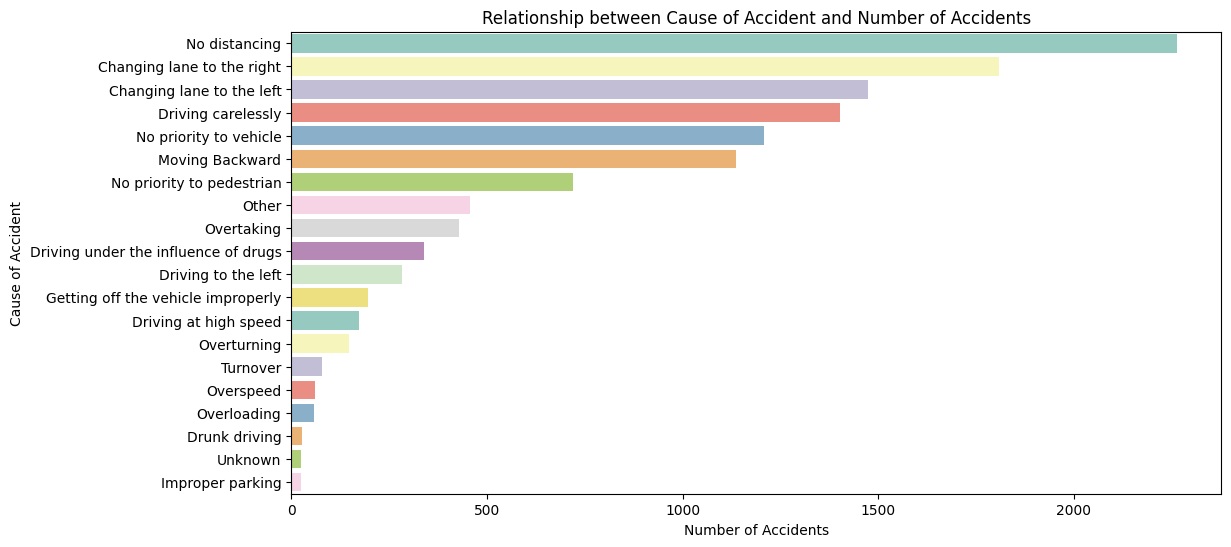

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Cause_of_accident', order=df['Cause_of_accident'].value_counts().index, palette="Set3")
plt.ylabel("Cause of Accident")
plt.xlabel("Number of Accidents")
plt.title("Relationship between Cause of Accident and Number of Accidents")
plt.show()

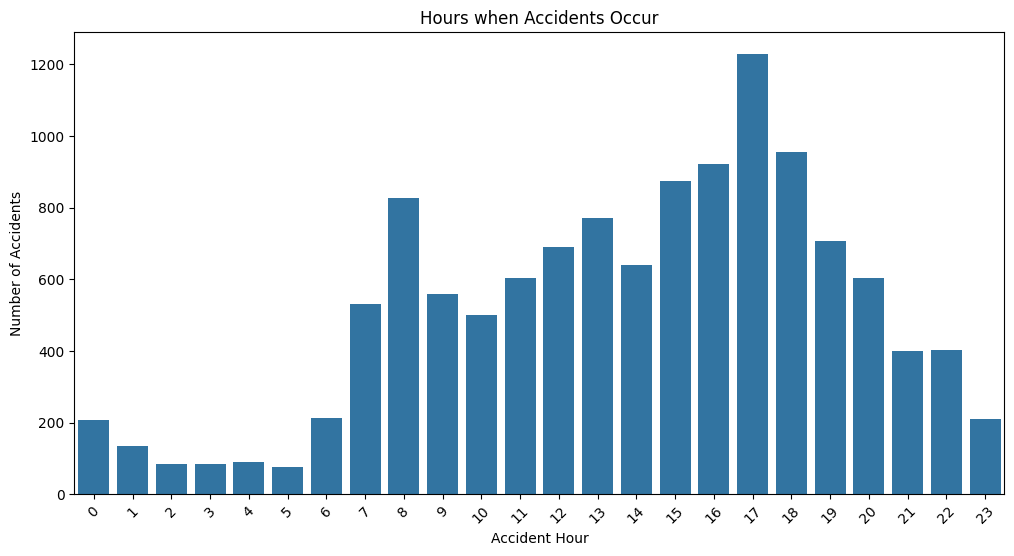

In [ ]:
df[['Hour', 'Minute', 'Second']] = df['Time'].str.split(":", expand=True)
df['Hour'] = df['Hour'].astype(int)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour')
plt.xlabel("Accident Hour")
plt.ylabel("Number of Accidents")
plt.title("Hours when Accidents Occur")
plt.xticks(rotation=45)
plt.show()

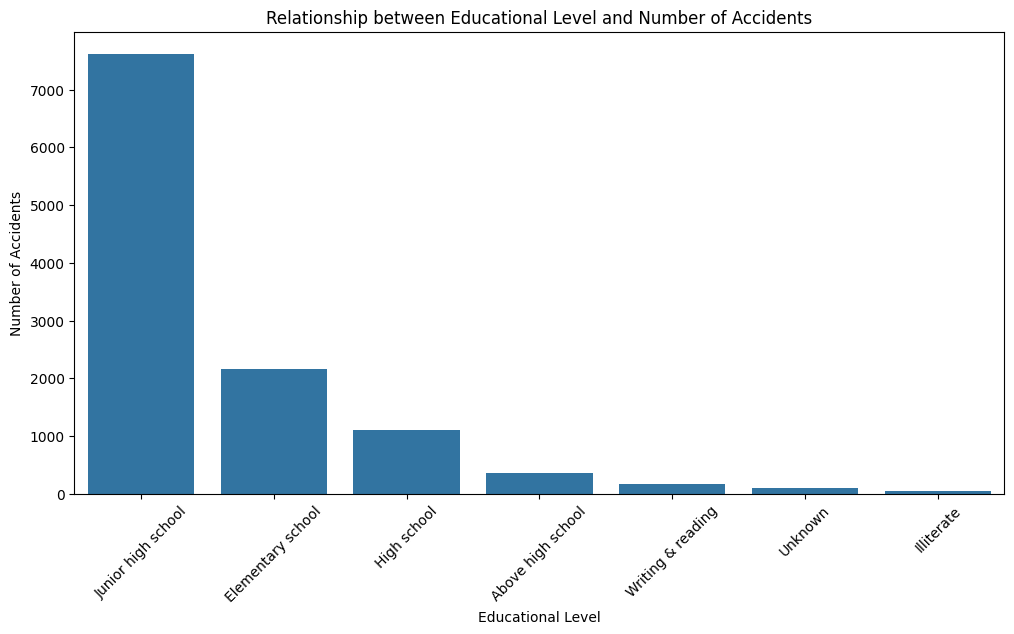

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Educational_level', order=df['Educational_level'].value_counts().index)
plt.xlabel("Educational Level")
plt.ylabel("Number of Accidents")
plt.title("Relationship between Educational Level and Number of Accidents")
plt.xticks(rotation=45)
plt.show()

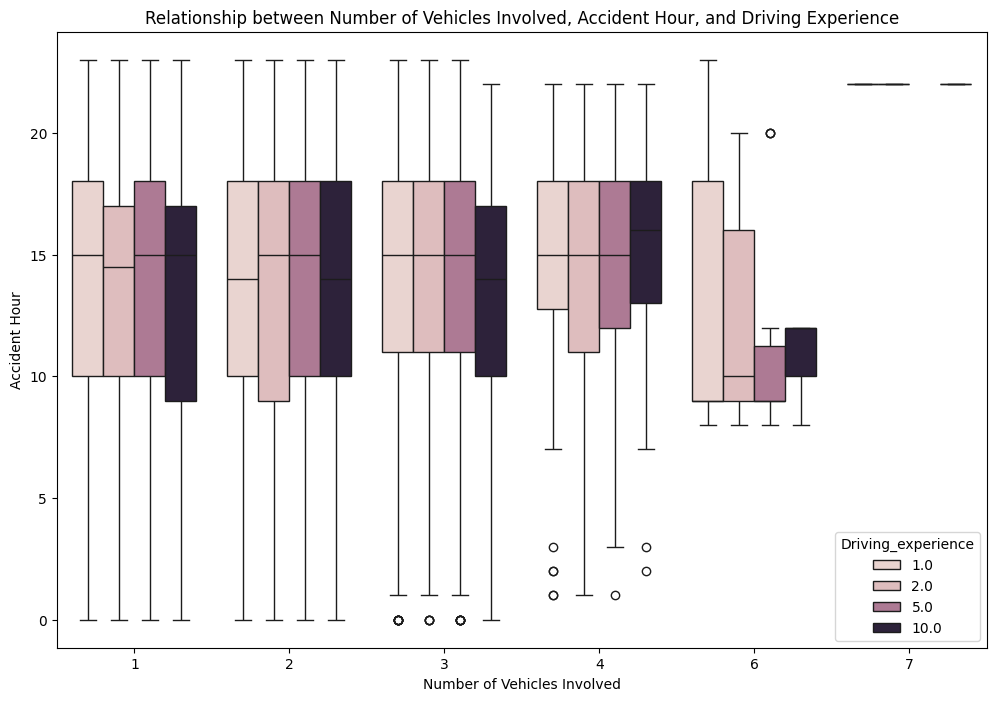

In [ ]:
df_filtered = df[df['Driving_experience'] != 'Unknown']
df_filtered['Driving_experience'] = df_filtered['Driving_experience'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='Number_of_vehicles_involved', y='Hour', hue='Driving_experience')
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Accident Hour")
plt.title("Relationship between Number of Vehicles Involved, Accident Hour, and Driving Experience")
plt.show()

In [ ]:
df = df.drop(['Time', 'Minute', 'Second'], axis=1)

non_numeric_columns = df.select_dtypes(exclude=['int', 'float'])
non_numeric_columns.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928
Defect_of_vehicle,4427


In [ ]:
# unique eleents in each column
for column in non_numeric_columns.columns:
    unique_elements = df[column].unique()
    print(f"Unique elements in column '{column}': {unique_elements}")

Unique elements in column 'Day_of_week': ['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday', 'Tuesday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' <
                         'Sunday']
Unique elements in column 'Age_band_of_driver': ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Unique elements in column 'Sex_of_driver': ['Male' 'Female' 'Unknown']
Unique elements in column 'Educational_level': ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Unique elements in column 'Vehicle_driver_relation': ['Employee' 'Unknown' 'Owner' nan 'Other']
Unique elements in column 'Driving_experience': ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Unique elements in column 'Type_of_vehicle': ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Tax

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # To store LabelEncoders
label_mappings = {}  # To store mapping (encoded values → original labels)

# Loop through each categorical column and encode it
for column in non_numeric_columns.columns:
    le = LabelEncoder()  # Create a new encoder for each column
    df[column] = le.fit_transform(df[column])  # Encode column

    # Store encoder for later decoding
    label_encoders[column] = le

    # Store mapping of encoded values to original labels
    label_mappings[column] = dict(zip(le.transform(le.classes_), le.classes_))


print(df.sample(3).T)


                             1167  5362  1366
Day_of_week                     6     4     5
Age_band_of_driver              4     1     2
Sex_of_driver                   0     1     1
Educational_level               3     2     7
Vehicle_driver_relation         0     1     4
Driving_experience              1     3     7
Type_of_vehicle                 0     5    17
Owner_of_vehicle                3     3     4
Service_year_of_vehicle         5     5     6
Defect_of_vehicle               2     2     3
Area_accident_occured           9     7     7
Lanes_or_Medians                4     4     2
Road_allignment                 5     5     5
Types_of_Junction               7     1     7
Road_surface_type               0     0     4
Road_surface_conditions         0     0     0
Light_conditions                3     3     0
Weather_conditions              2     3     0
Type_of_collision               8     8     8
Number_of_vehicles_involved     2     2     1
Number_of_casualties            1 

In [ ]:
label_mappings['Educational_level']

{0: 'Above high school',
 1: 'Elementary school',
 2: 'High school',
 3: 'Illiterate',
 4: 'Junior high school',
 5: 'Unknown',
 6: 'Writing & reading',
 7: nan}

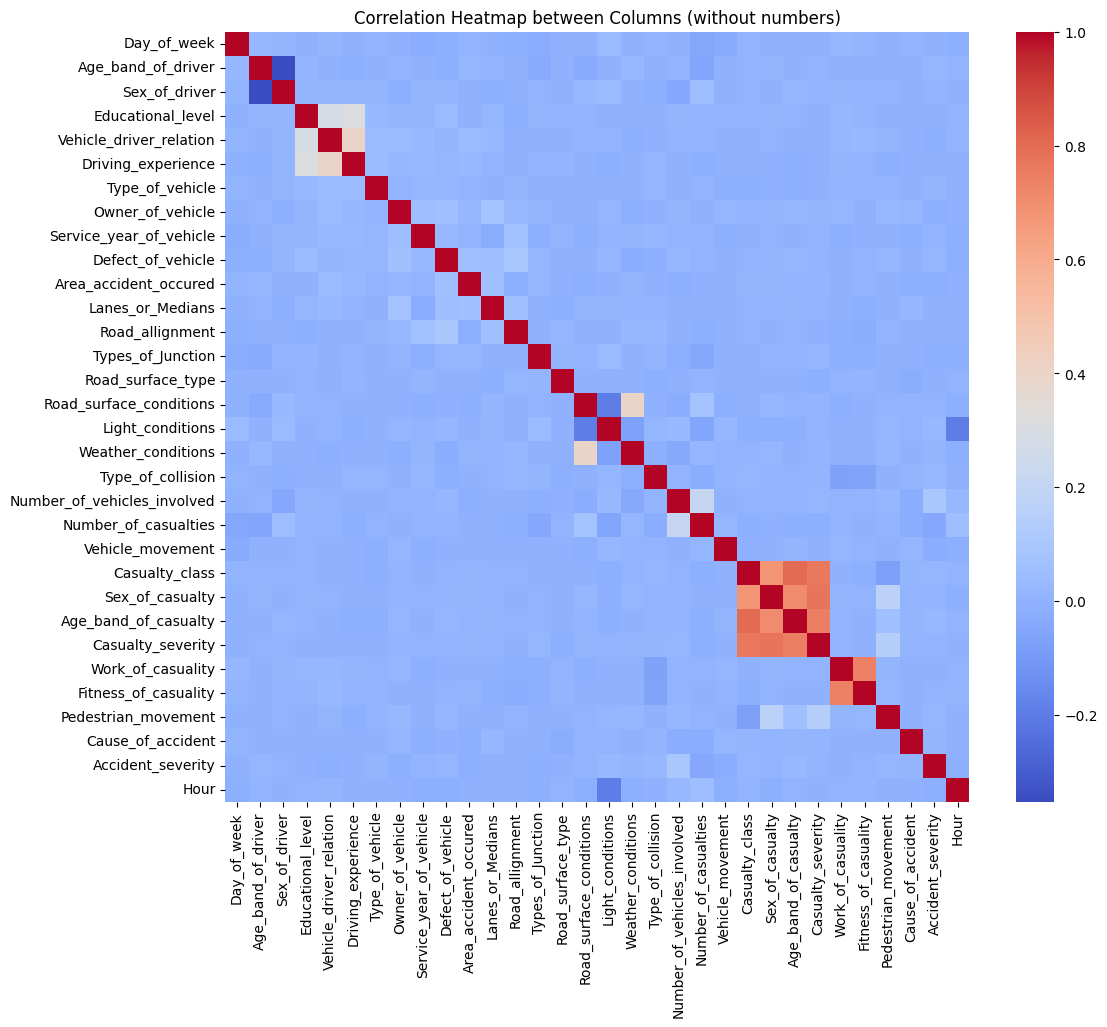

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap between Columns (without numbers)")
plt.show()

In [ ]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour'],
      dtype='object')

In [ ]:
X = df.drop(columns=["Accident_severity"])
y = df["Accident_severity"]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
np.unique(y_pred)

array([1, 2])

Model Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.80      0.02      0.04       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.55      0.34      0.32      2464
weighted avg       0.82      0.84      0.77      2464



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


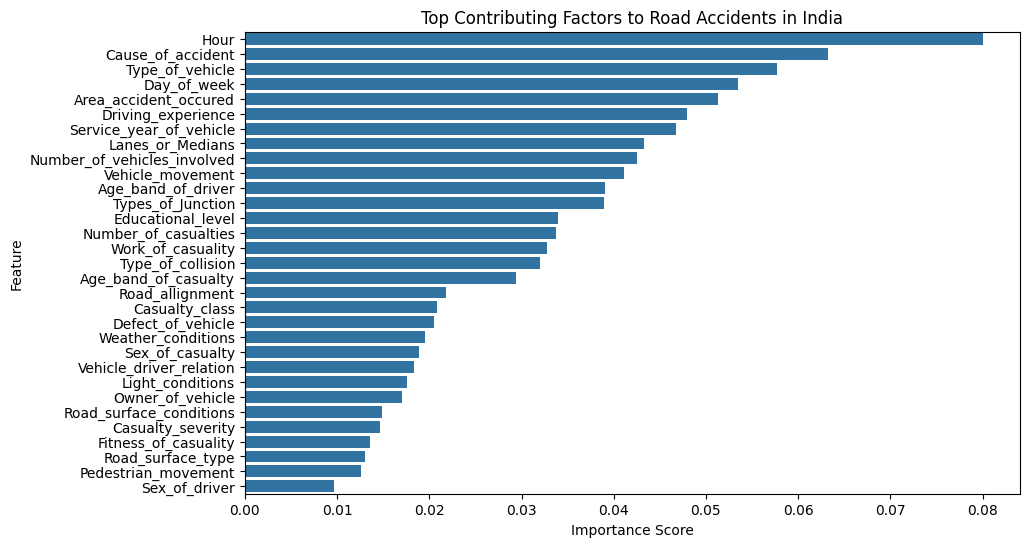

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Analyze Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#  Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title('Top Contributing Factors to Road Accidents in India')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
label_encoders = {}

# Loop through each categorical column and encode it
for column in non_numeric_columns.columns:
    le = LabelEncoder()  # Create a new encoder for each column
    df[column] = le.fit_transform(df[column])  # Encode column
    label_encoders[column] = le  # Store encoder for decoding later

In [ ]:
label_encoders

{'Day_of_week': LabelEncoder(),
 'Age_band_of_driver': LabelEncoder(),
 'Sex_of_driver': LabelEncoder(),
 'Educational_level': LabelEncoder(),
 'Vehicle_driver_relation': LabelEncoder(),
 'Driving_experience': LabelEncoder(),
 'Type_of_vehicle': LabelEncoder(),
 'Owner_of_vehicle': LabelEncoder(),
 'Service_year_of_vehicle': LabelEncoder(),
 'Defect_of_vehicle': LabelEncoder(),
 'Area_accident_occured': LabelEncoder(),
 'Lanes_or_Medians': LabelEncoder(),
 'Road_allignment': LabelEncoder(),
 'Types_of_Junction': LabelEncoder(),
 'Road_surface_type': LabelEncoder(),
 'Road_surface_conditions': LabelEncoder(),
 'Light_conditions': LabelEncoder(),
 'Weather_conditions': LabelEncoder(),
 'Type_of_collision': LabelEncoder(),
 'Vehicle_movement': LabelEncoder(),
 'Casualty_class': LabelEncoder(),
 'Sex_of_casualty': LabelEncoder(),
 'Age_band_of_casualty': LabelEncoder(),
 'Casualty_severity': LabelEncoder(),
 'Work_of_casuality': LabelEncoder(),
 'Fitness_of_casuality': LabelEncoder(),
 'Pe

In [ ]:
decoded_y_pred = [label_mappings['Accident_severity'][value] for value in y_pred]

In [ ]:
decoded_y_pred

['Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight I

In [ ]:
import pandas as pd

# Sample accident data for prediction
new_accident_data = pd.DataFrame({
    #'Speed': [40, 60, 80, 100, 50],
    'Weather_conditions': [0, 1, 2, 0, 2],  # Example: 0 = Clear, 1 = Rainy, 2 = Foggy
    'Road_surface_conditions': [1, 2, 0, 1, 2],  # Example: 0 = Dry, 1 = Wet, 2 = Icy
    'Hour': [9, 18, 23, 15, 21],  # Hour of accident
    'Minute': [15, 45, 10, 30, 50], # Minute of the hour

})

print(new_accident_data)


   Weather_conditions  Road_surface_conditions  Hour  Minute
0                   0                        1     9      15
1                   1                        2    18      45
2                   2                        0    23      10
3                   0                        1    15      30
4                   2                        2    21      50


In [ ]:
X_columns = X.columns.tolist()


In [ ]:
X_columns = X.columns.tolist()

#  Creating new_accident_data with initial columns
new_accident_data = pd.DataFrame({
    'Weather_conditions': [0, 1, 2, 0, 2],
    'Road_surface_conditions': [1, 2, 0, 1, 2],
    'Hour': [9, 18, 23, 15, 21],

})


for col in X_columns:
    if col not in new_accident_data.columns:
        new_accident_data[col] = X[col].mode()[0]

# Reorder columns to match X
new_accident_data = new_accident_data[X_columns]

# Encode categorical columns
for column in label_encoders:
    if column in new_accident_data.columns:

        new_accident_data[column] = new_accident_data[column].fillna(X[column].mode()[0])
        new_accident_data[column] = label_encoders[column].transform(new_accident_data[column])

print(new_accident_data)


   Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0            0                   0              1                  4   
1            0                   0              1                  4   
2            0                   0              1                  4   
3            0                   0              1                  4   
4            0                   0              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   2                0   
1                        0                   2                0   
2                        0                   2                0   
3                        0                   2                0   
4                        0                   2                0   

   Owner_of_vehicle  Service_year_of_vehicle  Defect_of_vehicle  ...  \
0                 3                        6                  2  ...   
1                 3 

In [ ]:


# Predict accident severity
predicted_severity = model.predict(new_accident_data)



In [ ]:
decoded_severity = [label_mappings['Accident_severity'][value] for value in predicted_severity]


In [ ]:
predicted_severity

array([2, 2, 2, 2, 2])

In [ ]:
decoded_severity

['Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury',
 'Slight Injury']